
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [349]:

import numpy as np
import matplotlib.pyplot as plt


In [350]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
        m,n = X.shape
        self.mean = np.zeros(n)
        self.scale = np.zeros(n)
        for i in range(n):
            self.mean[i] = np.mean(X[:, i])
            self.scale[i] = np.std(X[:, i])
        return self

    
    def transform(self, X):
        m,n = X.shape
        X_scaled = np.zeros((m,n))
        for i in range(n):
            X_scaled[:, i] = (X[:, i] - self.mean[i]) / self.scale[i]
        return X_scaled
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [351]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for epoch in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            errors = y_pred - y

            # Compute gradients with L2 regularization
            dw = (1 / n_samples) * (np.dot(X.T, errors) + self.l2_lambda * self.weights)
            db = (1 / n_samples) * np.sum(errors)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Calculate and store the loss with L2 regularization
            loss = (1 / (2 * n_samples)) * np.sum(errors ** 2) + (self.l2_lambda / 2) * np.sum(self.weights ** 2)
            self.losses.append(loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [352]:
# Dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100)

In [353]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)
lr_model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=0.1)
# Use the scaler and lr_model as needed
lr_model.fit(X_scaled, y)
y_pred = lr_model.predict(X_scaled)

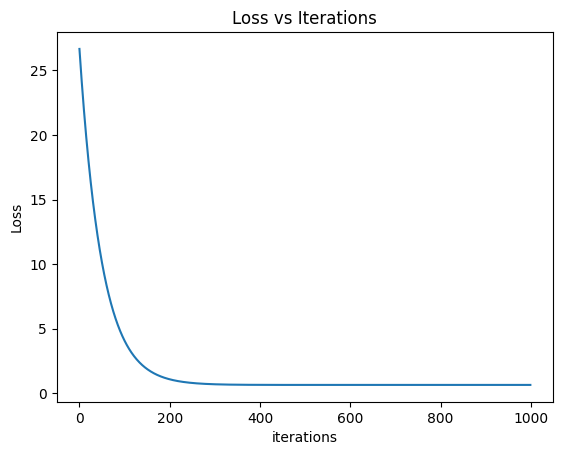

In [354]:
plt.plot(lr_model.losses)
plt.xlabel('iterations')
plt.ylabel('Loss') 
plt.title('Loss vs Iterations')
plt.show()

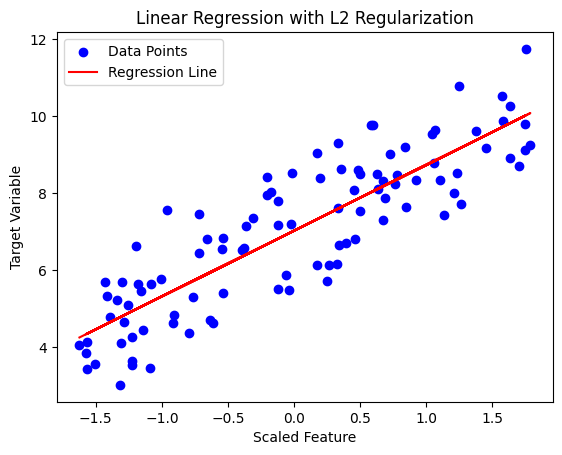

In [355]:
plt.scatter(X_scaled, y, color='blue', label='Data Points')
plt.plot(X_scaled, y_pred, color='red', label='Regression Line')
plt.xlabel('Scaled Feature')
plt.ylabel('Target Variable')
plt.title('Linear Regression with L2 Regularization')
plt.legend()
plt.show()

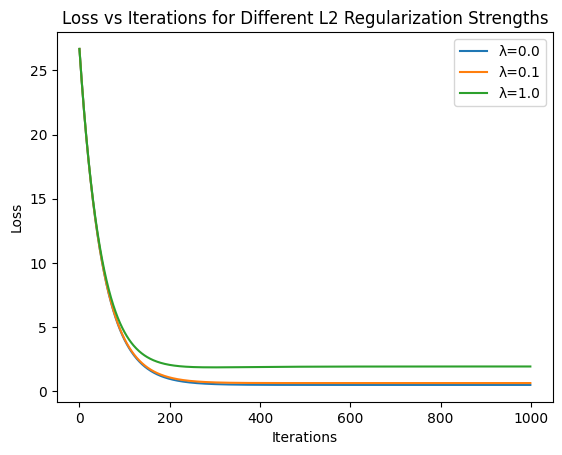

In [356]:
# L2 regularization

lambdas = [0.0, 0.1, 1.0]
for l2_lambda in lambdas:
    model = LinearRegressionManual(lr=0.01, epochs=1000, l2_lambda=l2_lambda)
    model.fit(X_scaled, y)
    plt.plot(model.losses, label=f'λ={l2_lambda}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations for Different L2 Regularization Strengths')
plt.legend()
plt.show()
    



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [357]:
# Dataset
np.random.seed(1)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X.flatten() + np.random.randn(100) > 7).astype(int)

In [358]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [359]:
# Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lor=0.1, epochs=1000, lor_lambda=0.0):
        self.lor = lor
        self.epochs = epochs
        self.lor_lambda = lor_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features))
        self.bias = 0
        self.losses = []

        for _ in range(self.epochs):
            z = X @ self.weights + self.bias
            y_hat = sigmoid(z)

            # Loss
            eps = 1e-15
            loss = - (1 / n_samples) * np.sum(y * np.log(y_hat + eps) + (1 - y)
                                              * np.log(1 - y_hat + eps)) + self.lor_lambda * np.sum(self.weights ** 2)
            self.losses.append(loss)

            # Gradients
            dw = (1 / n_samples) * (X.T @ (y_hat - y)) + \
                2 * self.lor_lambda * self.weights
            db = (1 / n_samples) * np.sum(y_hat - y)

            # Update
            self.weights -= self.lor * dw
            self.bias -= self.lor * db

    def predict_proba(self, X):
        return sigmoid(X @ self.weights + self.bias)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [360]:
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)
lor_model = LogisticRegressionManual(lor=0.01, epochs=1000, lor_lambda=0.1)
lor_model.fit(X_scaled, y)

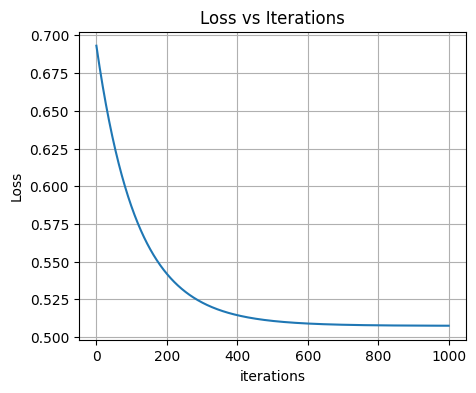

In [361]:
plt.figure(figsize=(5, 4))
plt.plot(lor_model.losses)
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.grid()
plt.show()

In [362]:
y_pred = lor_model.predict(X_scaled)
accuracy = np.mean(y_pred == y)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 90.00%


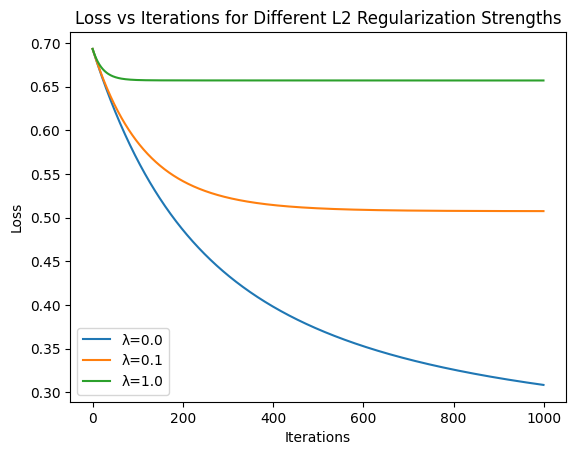

In [363]:
for l2_lambda in [0.0, 0.1, 1.0]:
    model = LogisticRegressionManual(lor=0.01, epochs=1000, lor_lambda=l2_lambda)
    model.fit(X_scaled, y)
    plt.plot(model.losses, label=f'λ={l2_lambda}')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations for Different L2 Regularization Strengths')
plt.legend()
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [364]:
np.random.seed(2)
M = np.random.rand(200, 200)*10
k= 5

In [365]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=50):
    n, m = M.shape

    # Initialize
    centroids = np.random.choice(M.flatten(), k, replace=False)
    assignment_table = np.zeros((n, m), dtype=int)

    for _ in range(max_iters):

        for i in range(n):
            for j in range(m):
                distances = np.abs(M[i, j] - centroids)
                assignment_table[i, j] = np.argmin(distances)

        new_centroids = np.zeros(k)
        counts = np.zeros(k)

        for i in range(n):
            for j in range(m):
                cluster = assignment_table[i, j]
                new_centroids[cluster] += M[i, j]
                counts[cluster] += 1

        for c in range(k):
            if counts[c] > 0:
                new_centroids[c] /= counts[c]
            else:
                new_centroids[c] = centroids[c]

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    cookbook = {i: [] for i in range(k)}
    for i in range(n):
        for j in range(m):
            cookbook[assignment_table[i, j]].append((i, j))

    return assignment_table, cookbook, centroids

In [366]:
assigned_table, cookbook, assigned_centers = kmeans_matrix(M, k)

In [368]:
print("Cluster Centers:\n", assigned_centers)   
print("\nAssignment Table:\n", assigned_table)
print("\nCookbook:")
for c in cookbook: print(f"Cluster {c}: {cookbook[c]}")


Cluster Centers:
 [6.96780727 8.99020793 2.97879229 4.96257635 0.99337084]

Assignment Table:
 [[3 4 3 ... 3 1 0]
 [3 3 2 ... 4 4 2]
 [2 3 3 ... 2 3 4]
 ...
 [0 3 3 ... 0 1 4]
 [1 1 3 ... 3 2 0]
 [1 4 2 ... 3 4 4]]

Cookbook:
Cluster 0: [(0, 7), (0, 10), (0, 15), (0, 25), (0, 32), (0, 36), (0, 39), (0, 47), (0, 61), (0, 62), (0, 75), (0, 78), (0, 82), (0, 92), (0, 93), (0, 96), (0, 97), (0, 100), (0, 103), (0, 114), (0, 116), (0, 121), (0, 127), (0, 140), (0, 144), (0, 145), (0, 149), (0, 158), (0, 162), (0, 164), (0, 175), (0, 176), (0, 177), (0, 182), (0, 187), (0, 192), (0, 199), (1, 7), (1, 16), (1, 22), (1, 29), (1, 30), (1, 31), (1, 34), (1, 37), (1, 42), (1, 45), (1, 48), (1, 49), (1, 60), (1, 62), (1, 65), (1, 68), (1, 74), (1, 80), (1, 81), (1, 85), (1, 87), (1, 106), (1, 113), (1, 118), (1, 144), (1, 145), (1, 149), (1, 162), (1, 165), (1, 167), (1, 169), (1, 170), (1, 178), (1, 186), (1, 191), (2, 6), (2, 12), (2, 20), (2, 26), (2, 31), (2, 34), (2, 41), (2, 43), (2, 49), (2


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
